### Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS 

from PIL import Image 
from mtbpy import mtbpy 
import seaborn as sns
import seaborn.objects as so

import nltk
import string

from nltk.corpus import stopwords
from collections import Counter

from nltk.stem import WordNetLemmatizer 
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer



In [2]:
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bahas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bahas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bahas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\bahas\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bahas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Importation des fichiers données

In [3]:
t_an = pd.read_fwf('C:/Users/bahas/Desktop/IA2/small_vocab_en.txt', index= None, header=None)

In [4]:
t_fr = pd.read_fwf('C:/Users/bahas/Desktop/IA2/small_vocab_fr.txt', index= None, header=None)

In [5]:
dic = pd.read_fwf('C:/Users/bahas/Desktop/IA2/NLP_Preprocessing/dictionnaire.txt', index= None, header=None)

### Selection des textes

In [6]:
corpus = t_an[0]
muscus = t_fr[0]
print(corpus); print(muscus)

0         new jersey is sometimes quiet during autumn , ...
1         the united states is usually chilly during jul...
2         california is usually quiet during march , and...
3         the united states is sometimes mild during jun...
4         your least liked fruit is the grape , but my l...
                                ...                        
137855    france is never busy during march , and it is ...
137856    india is sometimes beautiful during spring , a...
137857    india is never wet during summer , but it is s...
137858    france is never chilly during january , but it...
137859    the orange is her favorite fruit , but the ban...
Name: 0, Length: 137860, dtype: object
0         new jersey est parfois calme pendant l' automn...
1         les états-unis est généralement froid en juill...
2         california est généralement calme en mars , et...
3         les états-unis est parfois légère en juin , et...
4         votre moins aimé fruit est le raisin , mais mo...
 

### Nuage des mots avant traitement du texte

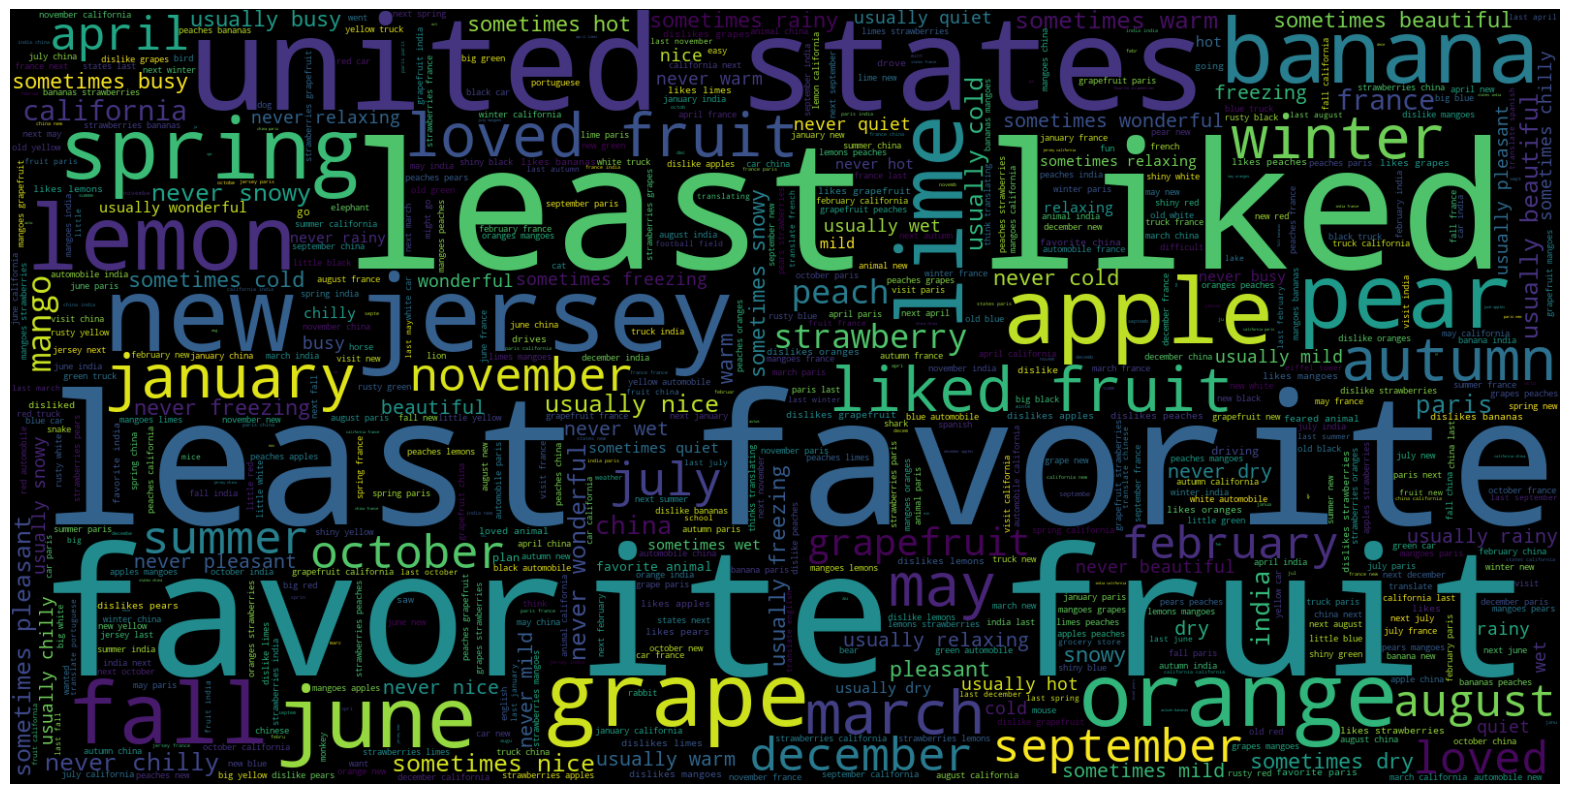

In [7]:
# Now lets plot word cloud for Real news. This will show the most common words when the news is Fake.
plt.figure(figsize=(20,20))
wc_ang = WordCloud(max_words= 2000, width= 1600, height= 800).generate(" ".join(corpus))#, stopwords= stopword_an
plt.imshow(wc_ang, interpolation= 'bilinear')
plt.axis('off')
plt.show()

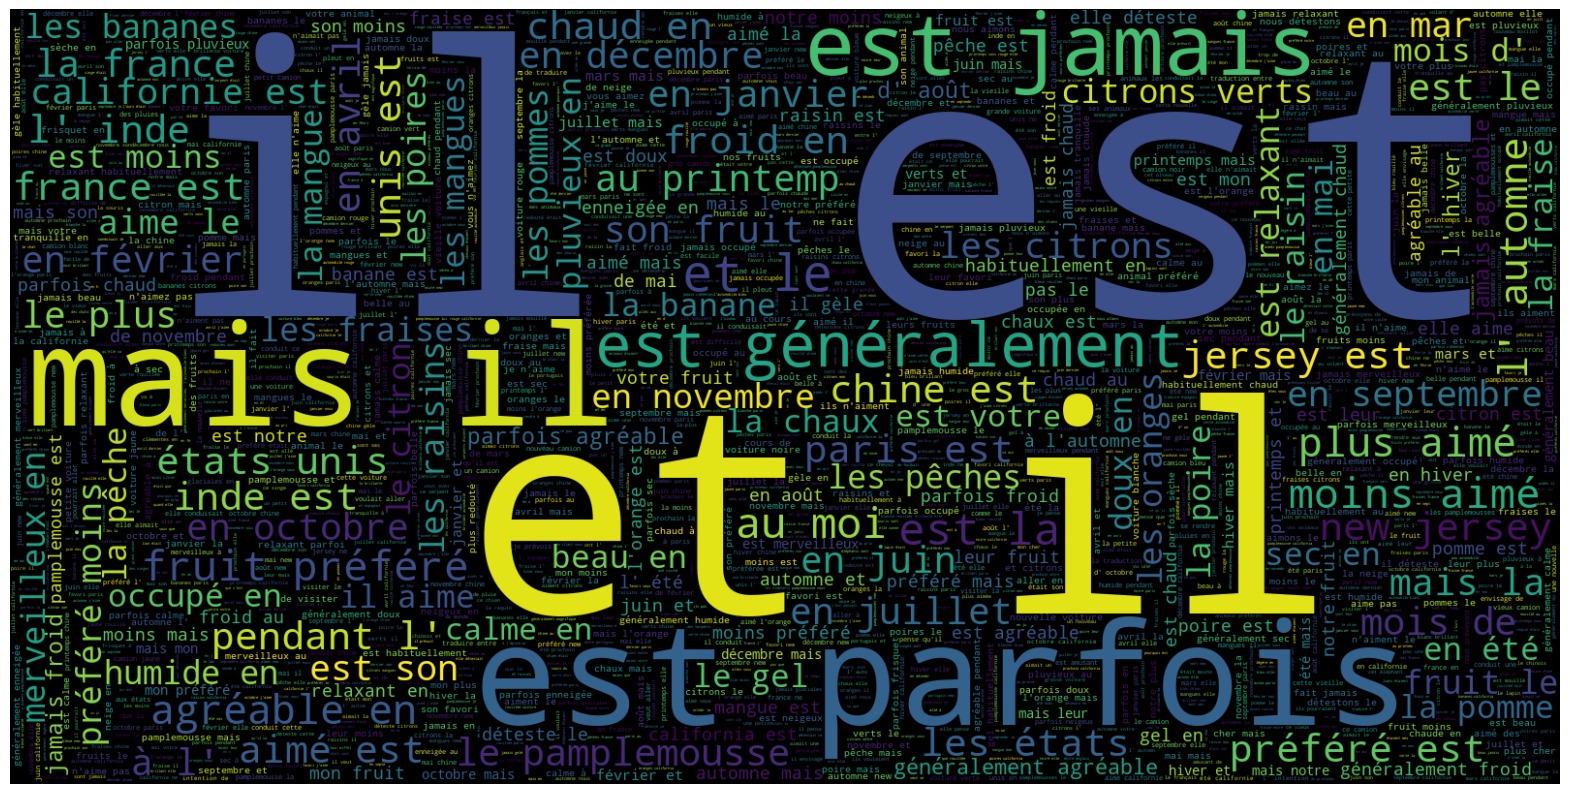

In [8]:
# Now lets plot word cloud for Real news. This will show the most common words when the news is Fake.
plt.figure(figsize=(20,20))
wc_fr = WordCloud(max_words= 2000, width= 1600, height= 800).generate(" ".join(muscus))
plt.imshow(wc_fr, interpolation= 'bilinear')

#, stopwords= stopword_fr

plt.axis('off')
plt.show()

### Prétraitement

In [9]:
stopwords_ang = nltk.corpus.stopwords.words('english')
stopwords_fr = nltk.corpus.stopwords.words('french')

words = set(nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer()

### Nuage des mots sans les stop words

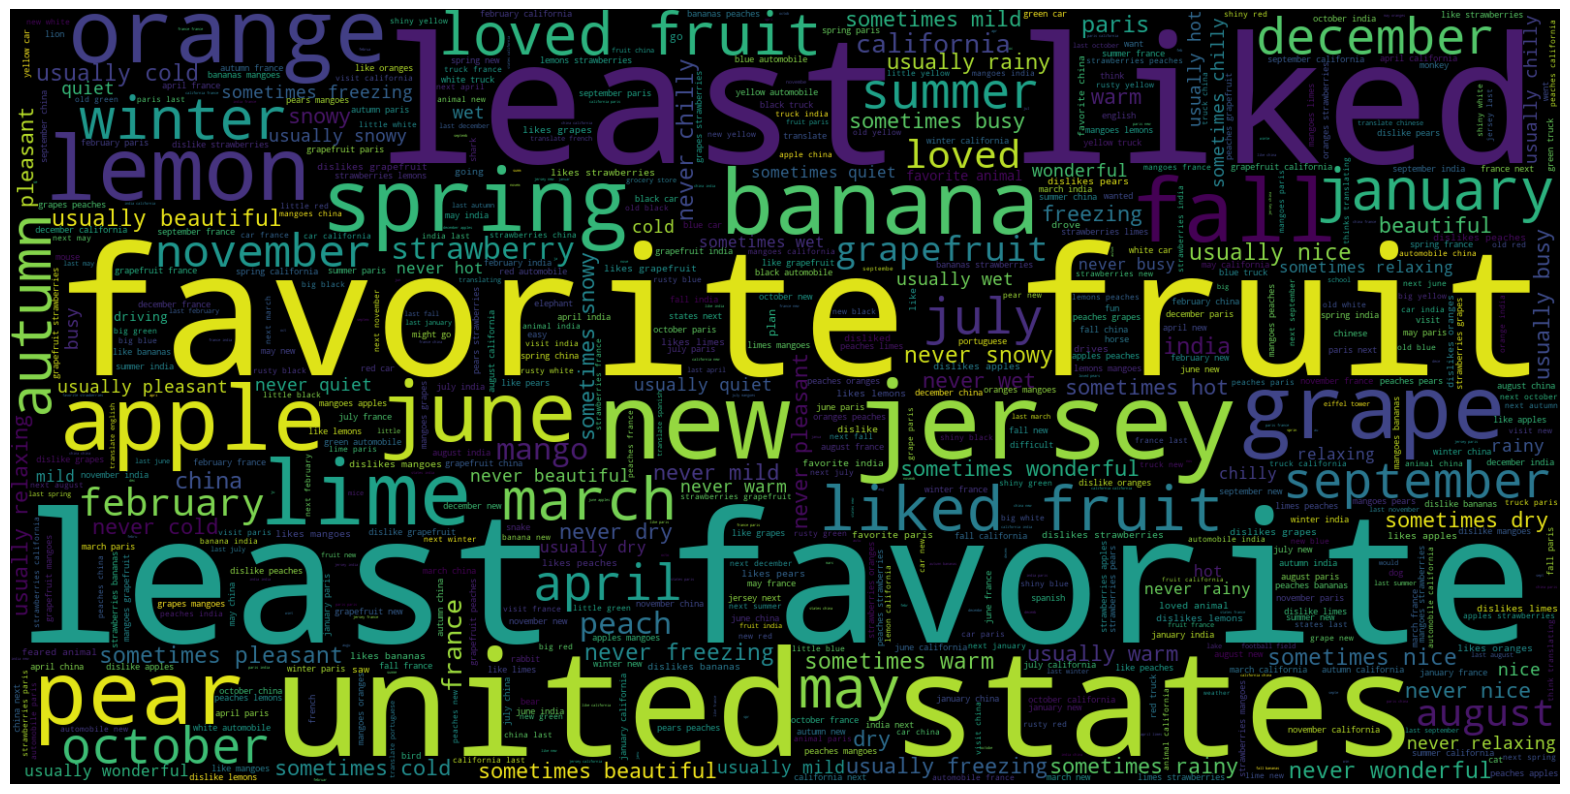

In [10]:
# Now lets plot word cloud for Real news. This will show the most common words when the news is Fake.
plt.figure(figsize=(20,20))
wc_ang = WordCloud(max_words= 2000, width= 1600, height= 800, stopwords= stopwords_ang).generate(" ".join(corpus))#
plt.imshow(wc_ang, interpolation= 'bilinear')
plt.axis('off')
plt.show()

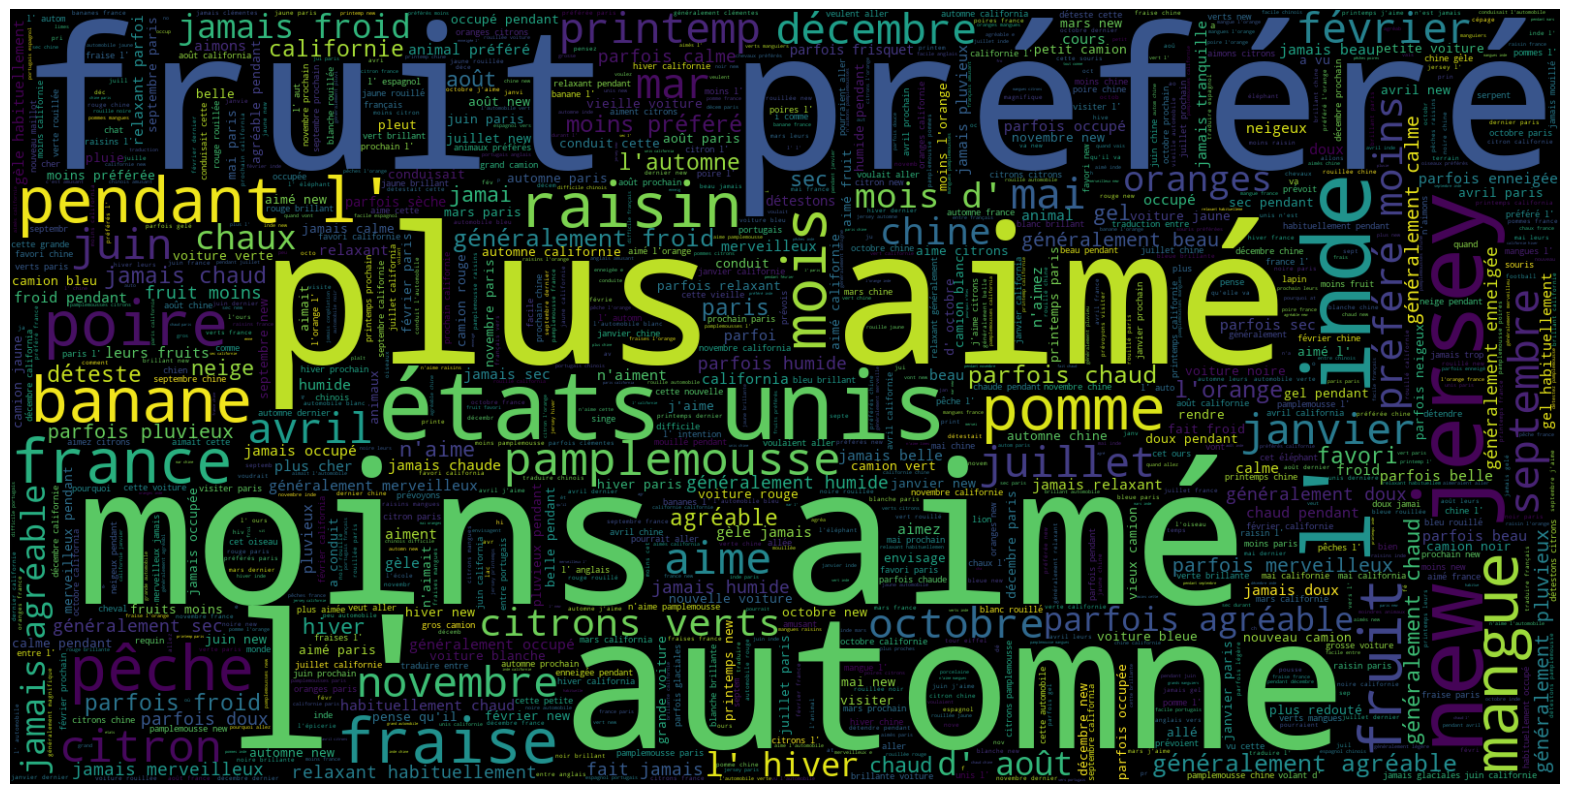

In [11]:
# Now lets plot word cloud for Real news. This will show the most common words when the news is Fake.
plt.figure(figsize=(20,20))
wc_fr = WordCloud(max_words= 2000, width= 1600, height= 800, stopwords= stopwords_fr).generate(" ".join(muscus))
plt.imshow(wc_fr, interpolation= 'bilinear')

plt.axis('off')
plt.show()

### Traitement : Nettoyage, Tokenisation, Lemmatisation

#### Anglais

In [12]:
def Preprocess_listofSentence_ang(listofSentence):
    preprocess_list = []
    for sentence in listofSentence :
        
        sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])
        
        sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

        tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)
        
        words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords_ang]
        
        words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)

        sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in words or not w.isalpha())
        
        preprocess_list.append(sentence_clean)
    
    return preprocess_list

In [13]:
corpus_list = Preprocess_listofSentence_ang(corpus)

#### Français

In [14]:
french_stopwords = nltk.corpus.stopwords.words('french')
mots = set(line.strip() for line in dic[0])
lemmatizer = FrenchLefffLemmatizer()

In [15]:
def French_Preprocess_listofSentence(listofSentence):
    preprocess_list = []
    for sentence in listofSentence :
        
        sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])
        
        sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())
 
        tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)
        
        words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords_fr]
        
        words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)
 
        sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in mots or not w.isalpha())
        
        preprocess_list.append(sentence_clean)
    
    return preprocess_list

In [16]:
muscus_list = French_Preprocess_listofSentence(muscus)

### Visulation d'une phrase avant et apres traitement 

In [17]:
print('Phrase de base : '+corpus[2])
print('Phrase nettoyée : '+corpus_list[2])

Phrase de base : california is usually quiet during march , and it is usually hot in june .
Phrase nettoyée : usually quiet march usually hot june


In [18]:
print('Phrase de base : '+muscus[0])
print('Phrase nettoyée : '+muscus_list[0])

Phrase de base : new jersey est parfois calme pendant l' automne , et il est neigeux en avril .
Phrase nettoyée : jersey parfois calme pendant automne neigeux avril


### Calcul de l'occurrence des mots

In [19]:
# Anglais
eap_text = " ".join(corpus_list)
eap_list = eap_text.split()
eap_counts = Counter(eap_list)
eap_common_words = [word[0] for word in eap_counts.most_common(25)]
eap_common_counts = [word[1] for word in eap_counts.most_common(25)]

In [20]:
#
eap_text_fr = ' '.join(muscus_list)
eap_list_fr = eap_text_fr.split()
eap_counts_fr = Counter(eap_list_fr)
eap_common_words_fr = [word[0] for word in eap_counts_fr.most_common(15)]
eap_common_counts_fr = [word[1] for word in eap_counts_fr.most_common(15)]

### Histogramme des 25 mots les plus fréquents

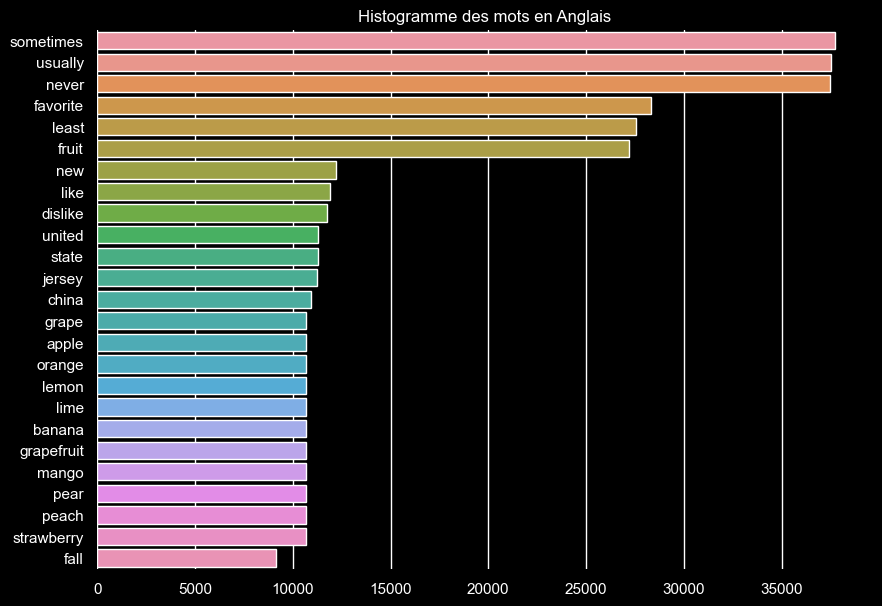

In [21]:
#Anglais
sns.set_theme(style="whitegrid")
plt.style.use('dark_background')
plt.figure(figsize=(10, 7))

sns.barplot(y=eap_common_words, x=eap_common_counts)
plt.title('Histogramme des mots en Anglais')
sns.despine(left=True, bottom=True)

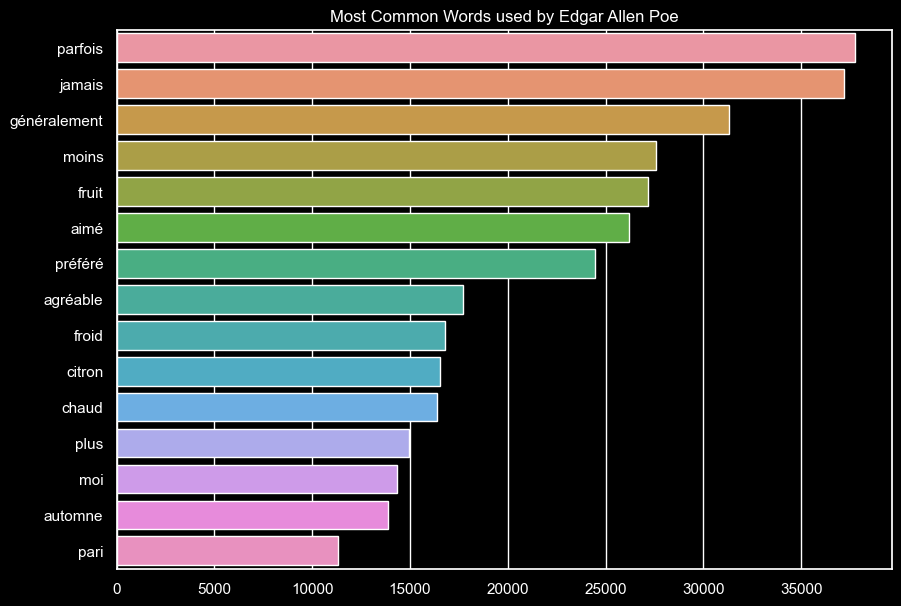

In [22]:
#Français
plt.style.use('dark_background')
plt.figure(figsize=(10, 7))

sns.barplot(y=eap_common_words_fr, x=eap_common_counts_fr)
plt.title('Most Common Words used by Edgar Allen Poe');

### Diagramme circulaire des 25 mots les plus fréquents 

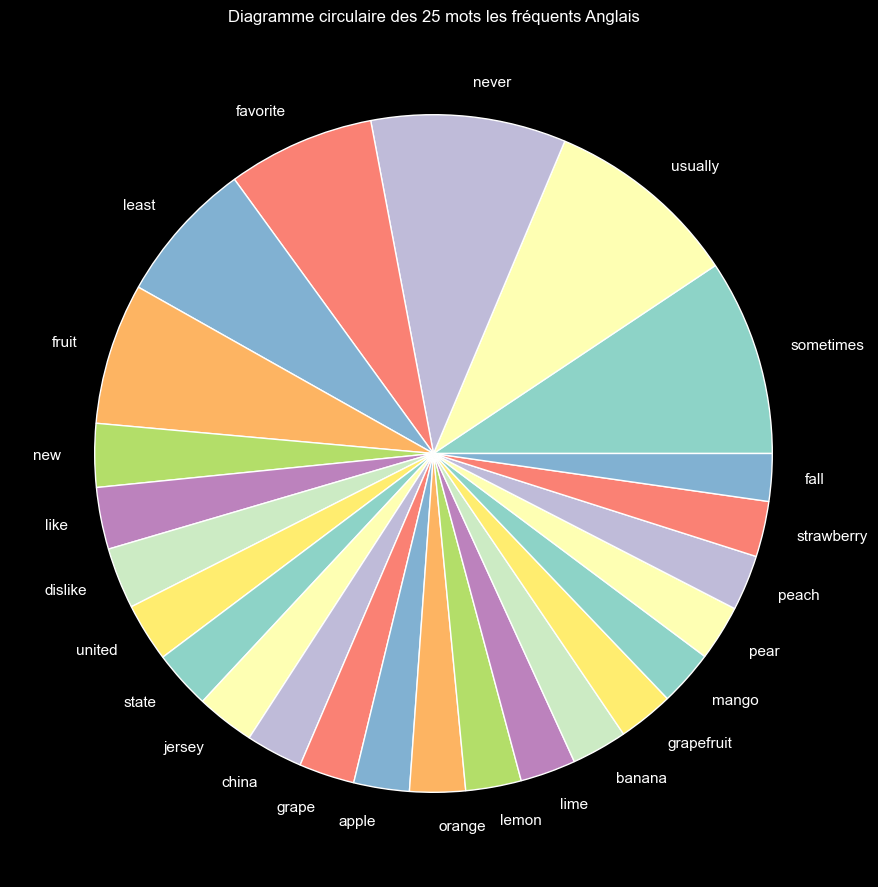

In [23]:
#Anglais
plt.figure(figsize=(11, 11))
plt.pie(eap_common_counts, labels=eap_common_words)
plt.title('Diagramme circulaire des 25 mots les fréquents Anglais')
sns.despine(left=True, bottom=True)

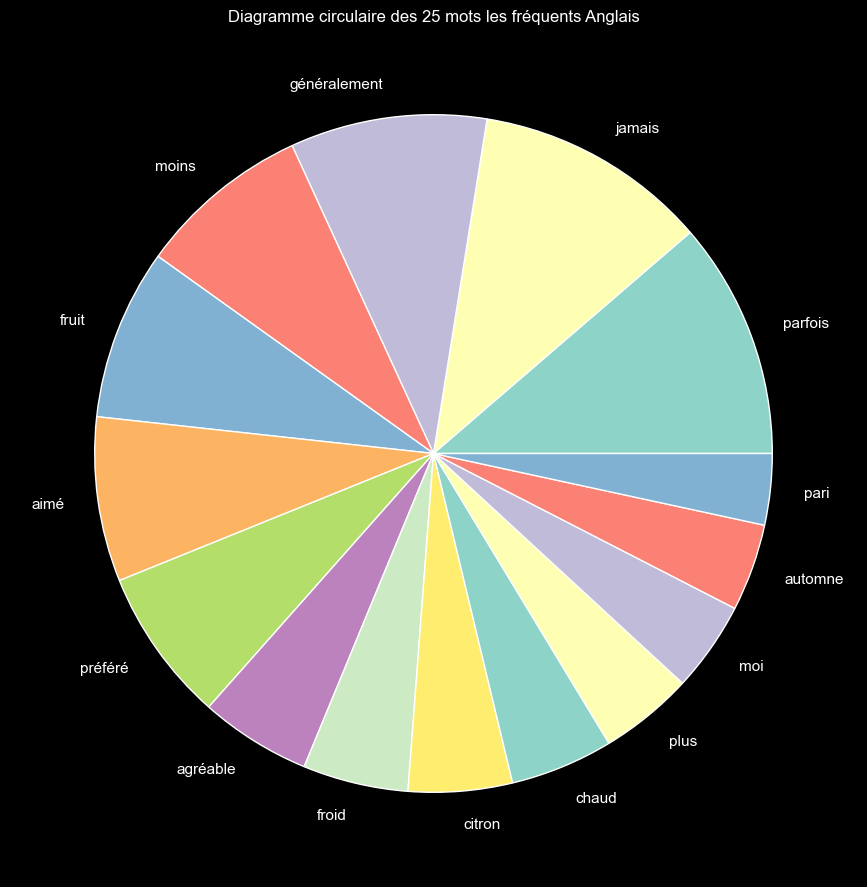

In [24]:
#Français
plt.figure(figsize=(11, 11))
plt.pie(eap_common_counts_fr, labels=eap_common_words_fr)
plt.title('Diagramme circulaire des 25 mots les fréquents Anglais')
plt.show()

### Nuage des points 

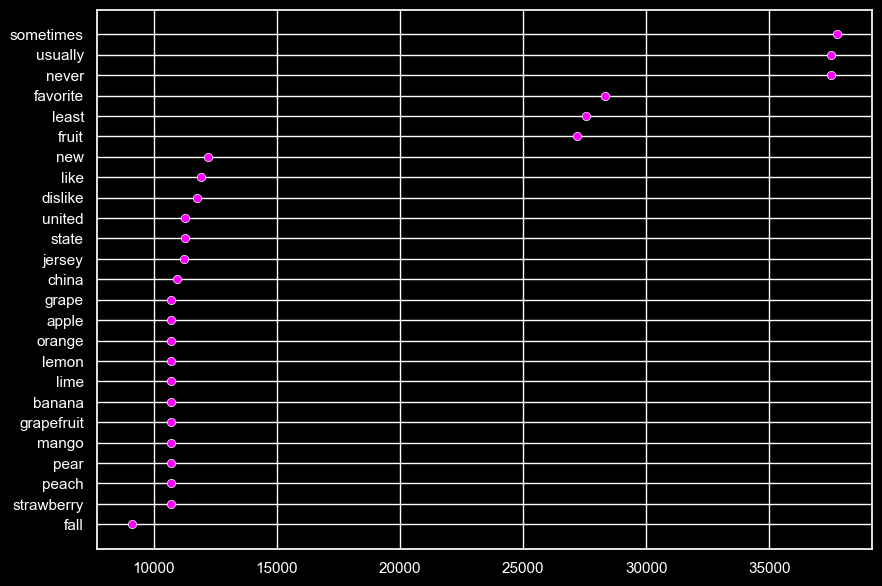

In [25]:
#Anglais
plt.figure(figsize=(10, 7))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=False)
ax = sns.scatterplot(y=eap_common_words, x=eap_common_counts,
                    color = 'magenta',
                     sizes=(10, 7),
                      legend="full")# 'blue'

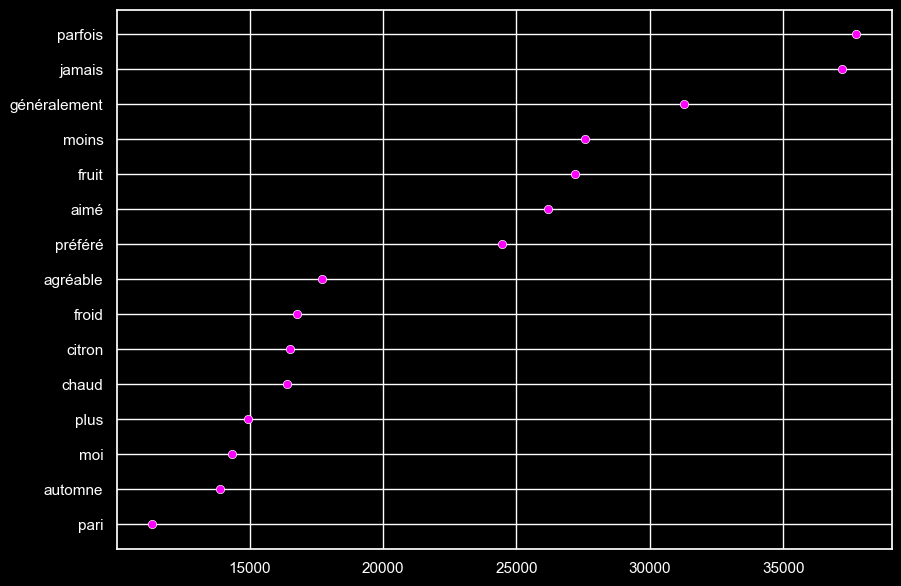

In [26]:
#Fançais
plt.figure(figsize=(10, 7))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=False)
ax = sns.scatterplot(y=eap_common_words_fr, x=eap_common_counts_fr,
                     sizes=(10, 7), color = 'magenta',
                      legend="full")